In [1]:
!pip install cv2

import os
import numpy as np
import sys
import cv2 as cv
import csv
import os, fnmatch
import pandas as pd
from shutil import *
import subprocess
import numpy as np


  Could not find a version that satisfies the requirement cv2 (from versions: )
No matching distribution found for cv2
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
def char_position(letter):
    return float(ord(letter) - 27)

def pos_to_char(pos):
    return chr(pos + 27)

char_position('B')

my_list = ['A', 'B', 'c'] 

new_string = [char_position(i) for i in my_list]

print(new_string)

[38.0, 39.0, 72.0]


In [3]:
!pip install Pillow


twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
mkl-random 1.0.1 requires cython, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [4]:
train_folder = "C:\Python\powercor_assets\\trainset\\"

In [5]:
test_folder = "C:\Python\powercor_assets\\testset\\"

In [6]:
import os
import numpy as np

print(train_folder)
os.chdir(train_folder)
train_files = os.listdir('.')

print("TRAINING FILES:")
print(train_files)

C:\Python\powercor_assets\trainset\
TRAINING FILES:
['B-144.1244531596-38.0631853338.jpg', 'B-144.1253848844-38.0583333024.jpg', 'B-144.1324877849-38.0445347396.jpg', 'B-144.1525780303-38.0603029365.jpg', 'B-144.1581683484-38.0527659656.jpg', 'B-144.1606307195-38.0525620324.jpg', 'B-144.1622445691-38.0515919339.jpg', 'B-144.1634806956-38.051878779.jpg', 'B-144.1646106866-38.055417847.jpg', 'B-144.1649998633-38.0502503713.jpg', 'B-144.165719776-38.0566260706.jpg', 'B-144.1667843577-38.0551643422.jpg', 'B-144.1676455749-38.03655959.jpg', 'B-144.1678569455-38.0511521572.jpg', 'B-144.1686085547-38.0551584505.jpg', 'B-144.1686769159-38.0409584566.jpg', 'B-144.169256789-38.0345269688.jpg', 'B-144.1694248224-38.0570848529.jpg', 'B-144.1694646155-38.0332662448.jpg', 'B-144.1711048222-38.0515547897.jpg', 'B-144.1721507499-38.0266272925.jpg', 'B-144.1721874107-38.047344558.jpg', 'B-144.1736863794-38.0278738725.jpg', 'B-144.1740872387-38.0384773234.jpg', 'B-144.1742387648-38.0361518724.jpg', 'B-1

In [7]:
labels = []

for train in train_files:
    labels.append(train[0])
    
print(labels)
print(train_files)

train_labels = np.array(labels)

train_labels2 = [char_position(i) for i in train_labels]

train_labels3 = [pos_to_char(int(i)) for i in train_labels2]

print(train_labels2)
print(train_labels3)

['B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'F', 'F', 'F', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'L', 'L', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T',

In [8]:
train_images = []

import cv2
import numpy as np
import matplotlib.pyplot as plt
from numpy import mean,cov,cumsum,dot,linalg,size,flipud,argsort
from pylab import imread,subplot,imshow,title,gray,figure,show,NullLocator,imsave
from PIL import Image
from PIL import ImageFilter
    
#== Parameters =======================================================================
BLUR = 21
CANNY_THRESH_1 = 10
CANNY_THRESH_2 = 200
MASK_DILATE_ITER = 1
MASK_ERODE_ITER = 1
MASK_COLOR = (0.1,0.1,0.1) # In BGR format


#== Processing =======================================================================
for train in train_files:
    
#area = (400, 400, 800, 800)
#cropped_img = img.crop(area)
#cropped_img.show()
    
#-- Read image -----------------------------------------------------------------------
    img = cv2.imread(train)
    area = (150, 150, 600, 600)
    cropped_img = img.crop(area)
    gray = cv2.cvtColor(cropped_img,cv2.COLOR_BGR2GRAY)

#-- Edge detection -------------------------------------------------------------------
    edges = cv2.Canny(gray, CANNY_THRESH_1, CANNY_THRESH_2)
    edges = cv2.dilate(edges, None)
    edges = cv2.erode(edges, None)

#-- Find contours in edges, sort by area ---------------------------------------------
    contour_info = []
    _, contours, _ = cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
# Previously, for a previous version of cv2, this line was: 
#  contours, _ = cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
# Thanks to notes from commenters, I've updated the code but left this note
    for c in contours:
        contour_info.append((
            c,
            cv2.isContourConvex(c),
            cv2.contourArea(c),
        ))
    contour_info = sorted(contour_info, key=lambda c: c[2], reverse=True)
    max_contour = contour_info[0]

#-- Create empty mask, draw filled polygon on it corresponding to largest contour ----
# Mask is black, polygon is white
    mask = np.zeros(edges.shape)
    cv2.fillConvexPoly(mask, max_contour[0], (255))

#-- Smooth mask, then blur it --------------------------------------------------------
    mask = cv2.dilate(mask, None, iterations=MASK_DILATE_ITER)
    mask = cv2.erode(mask, None, iterations=MASK_ERODE_ITER)
    mask = cv2.GaussianBlur(mask, (BLUR, BLUR), 0)
    mask_stack = np.dstack([mask]*3)    # Create 3-channel alpha mask
    
#-- Blend masked img into MASK_COLOR background --------------------------------------
    mask_stack  = mask_stack.astype('float32') / 255.0          # Use float matrices, 
    img         = img.astype('float32') / 255.0                 #  for easy blending

    masked = (mask_stack * img) + ((1-mask_stack) * MASK_COLOR) # Blend
    masked = (masked * 255).astype('uint8')                     # Convert back to 8-bit 

# split image into channels
    c_red, c_green, c_blue = cv2.split(img)

# merge with mask got on one of a previous steps
    img_a = cv2.merge((c_red, c_green, c_blue, mask.astype('float32') / 255.0))

    #%matplotlib inline
    #plt.imshow(img_a)
    #plt.show()
    
    #gray = cv2.cvtColor(img_a, cv2.COLOR_BGR2GRAY)
    #vertical = np.copy(img_a)
    #vertical = cv2.bitwise_not(vertical)
    #edges = cv2.adaptiveThreshold(vertical, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, -2)

    #%matplotlib inline
    #plt.imshow(img_a)
    #plt.show()
    
    train_images.append(img_a)


In [9]:
train_images_np4 = np.array(train_images)
print(train_images_np4.shape)

#x = np.zeros( (28, 300, 600, 3) )
train_images_np = train_images_np4[:, :, :, 0]
print(train_images_np.shape)

trn_img = train_images_np.reshape(train_images_np.shape[1]*train_images_np.shape[2], train_images_np.shape[0])
trn_img = trn_img.transpose()
print(trn_img.shape)

(218, 300, 600, 4)
(218, 300, 600)
(218, 180000)


In [10]:
!pip install keras

mkl-random 1.0.1 requires cython, which is not installed.
twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [11]:
os.chdir(test_folder)
test_files = os.listdir('.')

print("TEST FILES:")
print(test_files)

TEST FILES:
['(144.1678569455, -38.0511521572).jpg', '(144.1683460159, -38.0569462133).jpg', '(144.1684074883, -38.0268227373).jpg', '(144.1684149637, -38.052811063).jpg', '(144.1686085547, -38.0551584505).jpg', '(144.1686769159, -38.0409584566).jpg', '(144.1689172172, -38.0477446579).jpg', '(144.1689989428, -38.0455082062).jpg', '(144.1691016817, -38.0261222559).jpg', '(144.1692146717, -38.0550903738).jpg', '(144.1694248224, -38.0570848529).jpg', '(144.1694646155, -38.0332662448).jpg', '(144.1695966781, -38.0319582474).jpg', '(144.1699373852, -38.0549095483).jpg', '(144.1703679071, -38.0535699833).jpg', '(144.1704493554, -38.0530631148).jpg', '(144.1706119991, -38.0488101919).jpg', '(144.1706529984, -38.0525364301).jpg', '(144.1706948774, -38.0310552017).jpg', '(144.1708344347, -38.0470707225).jpg', '(144.1708477468, -38.0546882234).jpg', '(144.1710741737, -38.0448194409).jpg', '(144.1711048222, -38.0515547897).jpg', '(144.1712432662, -38.0369959978).jpg', '(144.1715601452, -38.047026

In [12]:
test_images = []

import cv2
import numpy as np
    
#== Parameters =======================================================================
BLUR = 21
CANNY_THRESH_1 = 10
CANNY_THRESH_2 = 200
MASK_DILATE_ITER = 1
MASK_ERODE_ITER = 1
MASK_COLOR = (0.1,0.1,0.1) # In BGR format

#== Processing =======================================================================
for test in test_files:

#-- Read image -----------------------------------------------------------------------
    img = cv2.imread(test)
    area = (150, 150, 600, 600)
    cropped_img = img.crop(area)
    gray = cv2.cvtColor(cropped_img,cv2.COLOR_BGR2GRAY)

#-- Edge detection -------------------------------------------------------------------
    edges = cv2.Canny(gray, CANNY_THRESH_1, CANNY_THRESH_2)
    edges = cv2.dilate(edges, None)
    edges = cv2.erode(edges, None)

#-- Find contours in edges, sort by area ---------------------------------------------
    contour_info = []
    _, contours, _ = cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
# Previously, for a previous version of cv2, this line was: 
#  contours, _ = cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
# Thanks to notes from commenters, I've updated the code but left this note
    for c in contours:
        contour_info.append((
            c,
            cv2.isContourConvex(c),
            cv2.contourArea(c),
        ))
    contour_info = sorted(contour_info, key=lambda c: c[2], reverse=True)
    max_contour = contour_info[0]

#-- Create empty mask, draw filled polygon on it corresponding to largest contour ----
# Mask is black, polygon is white
    mask = np.zeros(edges.shape)
    cv2.fillConvexPoly(mask, max_contour[0], (255))

#-- Smooth mask, then blur it --------------------------------------------------------
    mask = cv2.dilate(mask, None, iterations=MASK_DILATE_ITER)
    mask = cv2.erode(mask, None, iterations=MASK_ERODE_ITER)
    mask = cv2.GaussianBlur(mask, (BLUR, BLUR), 0)
    mask_stack = np.dstack([mask]*3)    # Create 3-channel alpha mask

#-- Blend masked img into MASK_COLOR background --------------------------------------
    mask_stack  = mask_stack.astype('float32') / 255.0          # Use float matrices, 
    img         = img.astype('float32') / 255.0                 #  for easy blending

    masked = (mask_stack * img) + ((1-mask_stack) * MASK_COLOR) # Blend
    masked = (masked * 255).astype('uint8')                     # Convert back to 8-bit 

# split image into channels
    c_red, c_green, c_blue = cv2.split(img)

# merge with mask got on one of a previous steps
    img_a = cv2.merge((c_red, c_green, c_blue, mask.astype('float32') / 255.0))
    
    #%matplotlib inline
    #plt.imshow(img_a)
    #plt.show()
       
    test_images.append(img_a)

In [13]:
test_images_np4 = np.array(test_images)
print(test_images_np4.shape)

test_images_np = test_images_np4[:, :, :, 0]
print(test_images_np.shape)
tst_img = test_images_np.reshape(test_images_np.shape[1]*test_images_np.shape[2], test_images_np.shape[0])
tst_img = tst_img.transpose()
print(tst_img.shape)

(104, 300, 600, 4)
(104, 300, 600)
(104, 180000)


In [19]:
import matplotlib.pyplot as plt
 
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential
from keras.optimizers import SGD
from keras.layers import Dense, Dropout, LSTM, BatchNormalization
from keras.callbacks import TensorBoard
from keras.callbacks import ModelCheckpoint
from keras.optimizers import adam

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(300, 600)),
    keras.layers.Dense(1800, activation=tf.nn.selu),
    keras.layers.Dense(60, activation=tf.nn.softmax)
])


epochs = 150
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8
sgd = keras.optimizers.SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
#sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
opt = adam(lr=0.001, decay=1e-6)
#sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
#nadam=keras.optimizers.Nadam(lr=0.004, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)
#model.compile(optimizer=sgd,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.compile(optimizer=tf.train.AdamOptimizer(),loss='sparse_categorical_crossentropy',metrics=["accuracy"])
model.fit(train_images_np,train_labels2,batch_size=218,epochs=150,verbose=1)

print("fit")
#clf2.fit(trn_img, train_labels)

test_labels = ['T', 'T', 'T', 'H', 'H', 'T', 'H', 'T', 'R', 'T', 'T', 'V', 'T', 'R', 'B', 'H', 'B', 'H', 'R', 'R', 'R', 'R', 'T', 'B', 'T', 'R', 'H', 'T', 'B', 'T', 'B', 'H', 'B', 'B', 'H', 'B', 'B', 'B', 'B', 'B', 'B', 'R', 'T', 'B', 'B', 'H', 'T', 'R', 'B', 'B', 'T', 'H', 'T', 'B', 'V', 'T', 'B', 'R', 'T', 'B', 'B', 'B', 'R', 'B', 'B', 'B', 'B', 'T', 'T', 'H', 'T', 'T', 'B', 'B', 'B', 'R', 'B', 'R', 'H', 'B', 'B', 'B', 'T', 'B', 'R', 'B', 'B', 'B', 'T', 'R', 'B', 'T', 'B', 'B', 'B', 'B', 'T', 'B', 'T', 'H', 'B', 'T', 'T', 'T']
test_labels2 = [char_position(i) for i in test_labels]

# evaluate the model
scores = model.evaluate(train_images_np, train_labels2)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

test_loss, test_acc = model.evaluate(test_images_np, test_labels2)
print('Test accuracy:', test_acc)

y_pred = model.predict(test_images_np,verbose=1)
print(y_pred)



Epoch 1/150
218/218 [==============================] - 263s 1s/sample - loss: 4.6325 - acc: 0.0000e+00
Epoch 2/150
218/218 [==============================] - 10s 44ms/sample - loss: 349.1630 - acc: 0.3211
Epoch 3/150
218/218 [==============================] - 6s 27ms/sample - loss: 947.4427 - acc: 0.2615
Epoch 4/150
218/218 [==============================] - 6s 26ms/sample - loss: 970.5926 - acc: 0.1697
Epoch 5/150
218/218 [==============================] - 6s 27ms/sample - loss: 671.1552 - acc: 0.1193
Epoch 6/150
218/218 [==============================] - 6s 27ms/sample - loss: 896.8655 - acc: 0.0872
Epoch 7/150
218/218 [==============================] - 6s 27ms/sample - loss: 579.9138 - acc: 0.2615
Epoch 8/150
218/218 [==============================] - 6s 27ms/sample - loss: 311.7525 - acc: 0.2615
Epoch 9/150
218/218 [==============================] - 6s 28ms/sample - loss: 275.1753 - acc: 0.3761
Epoch 10/150
218/218 [==============================] - 6s 27ms/sample - loss: 672.3641 

Epoch 82/150
218/218 [==============================] - 6s 28ms/sample - loss: 11.1868 - acc: 0.6881
Epoch 83/150
218/218 [==============================] - 6s 29ms/sample - loss: 10.8224 - acc: 0.6881
Epoch 84/150
218/218 [==============================] - 6s 28ms/sample - loss: 7.8880 - acc: 0.7431
Epoch 85/150
218/218 [==============================] - 6s 29ms/sample - loss: 10.9766 - acc: 0.6147
Epoch 86/150
218/218 [==============================] - 6s 30ms/sample - loss: 7.4934 - acc: 0.7798
Epoch 87/150
218/218 [==============================] - 6s 29ms/sample - loss: 13.4078 - acc: 0.7202
Epoch 88/150
218/218 [==============================] - 6s 28ms/sample - loss: 12.0258 - acc: 0.7248
Epoch 89/150
218/218 [==============================] - 6s 29ms/sample - loss: 5.2927 - acc: 0.8211
Epoch 90/150
218/218 [==============================] - 6s 29ms/sample - loss: 8.2775 - acc: 0.7156
Epoch 91/150
218/218 [==============================] - 6s 29ms/sample - loss: 5.4545 - acc: 0.

['F', 'B', 'B', 'B', 'B', 'H', 'R', 'B', 'B', 'B', 'B', 'B', 'H', 'B', 'B', 'B', 'B', 'B', 'B', 'R', 'B', 'G', 'F', 'B', 'T', 'B', 'B', 'F', 'G', 'T', 'B', 'T', 'B', 'B', 'B', 'G', 'G', 'B', 'T', 'G', 'G', 'F', 'B', 'B', 'B', 'B', 'T', 'F', 'T', 'B', 'G', 'B', 'B', 'B', 'F', 'B', 'B', 'R', 'B', 'G', 'B', 'B', 'F', 'B', 'T', 'B', 'G', 'T', 'T', 'B', 'F', 'B', 'T', 'V', 'B', 'T', 'T', 'T', 'B', 'B', 'B', 'B', 'T', 'B', 'B', 'B', 'B', 'B', 'G', 'B', 'R', 'T', 'R', 'B', 'T', 'B', 'G', 'B', 'G', 'T', 'H', 'B', 'B', 'G']


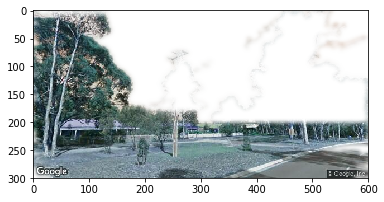

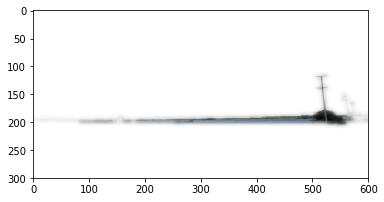

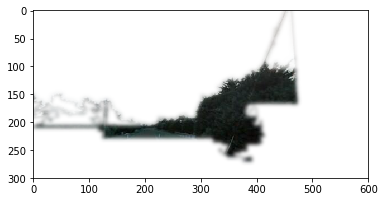

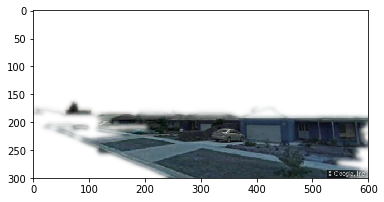

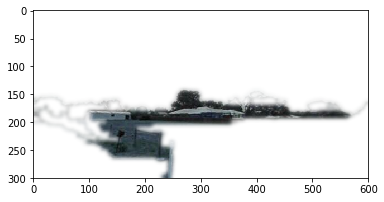

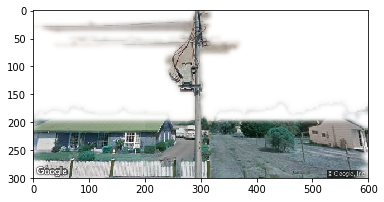

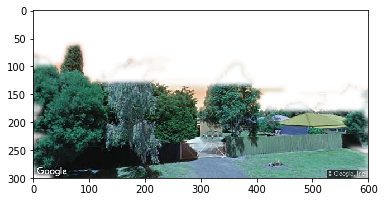

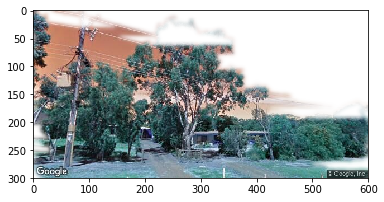

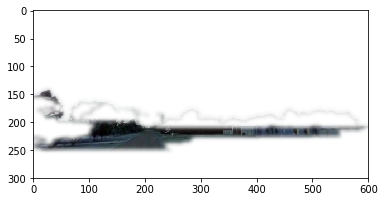

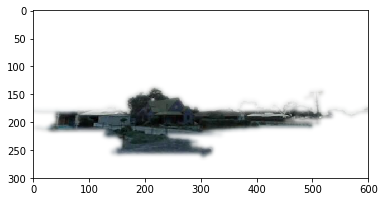

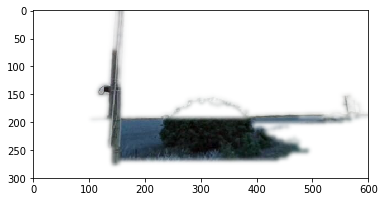

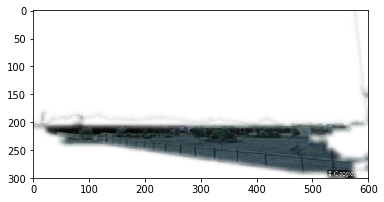

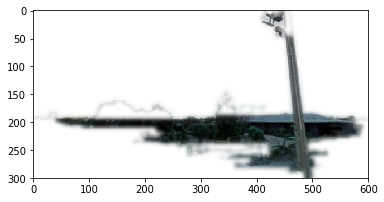

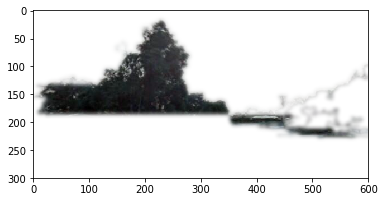

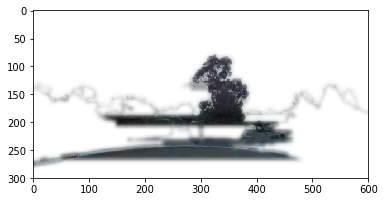

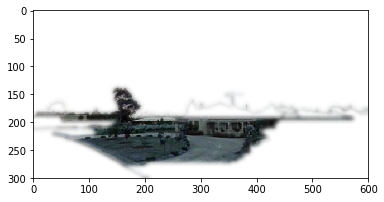

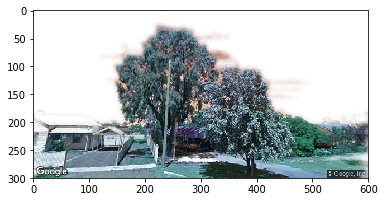

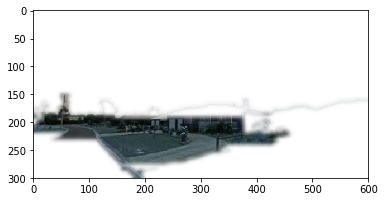

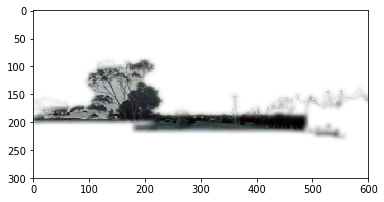

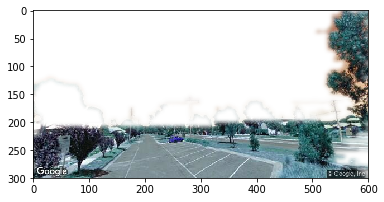

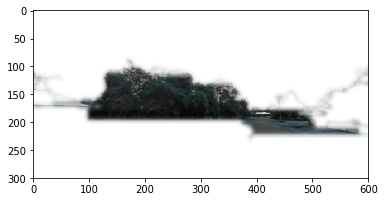

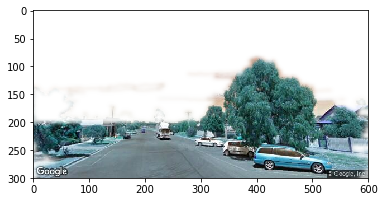

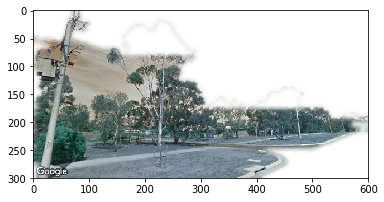

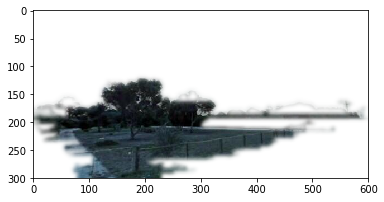

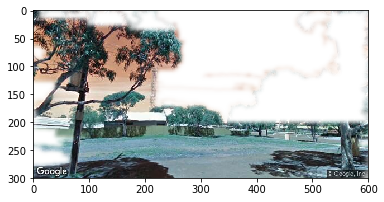

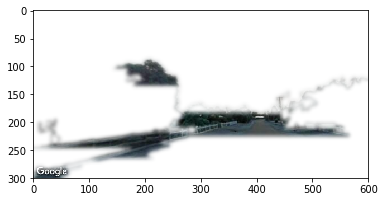

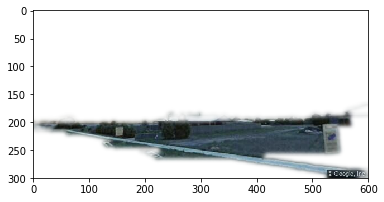

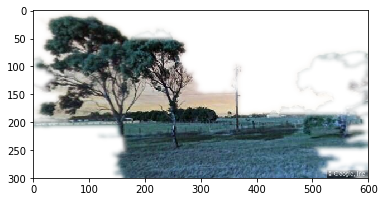

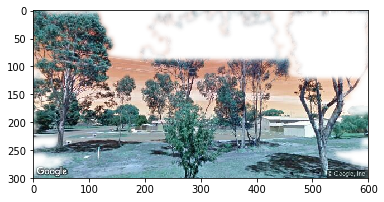

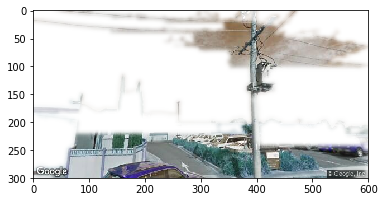

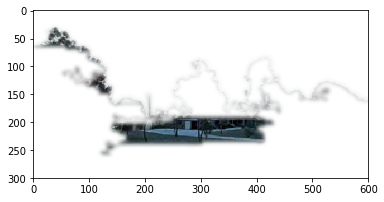

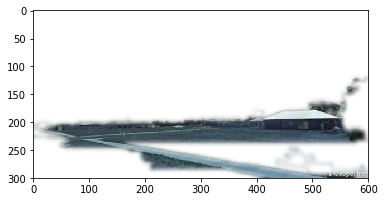

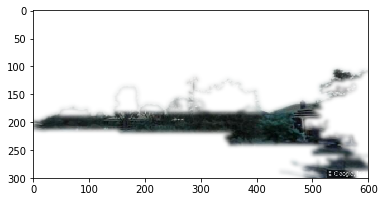

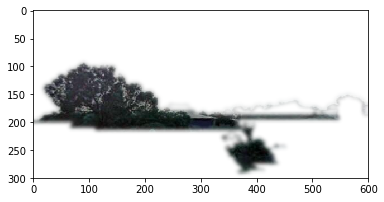

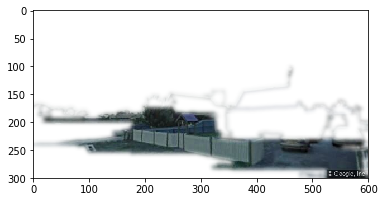

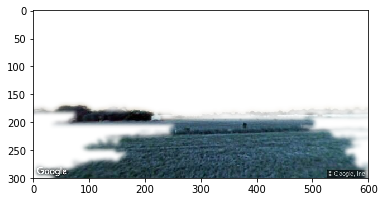

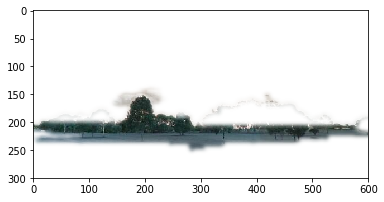

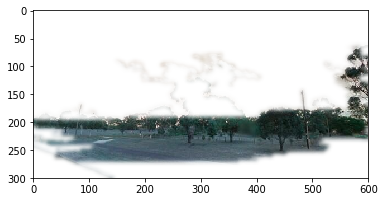

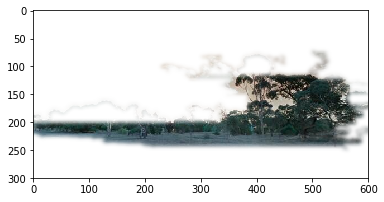

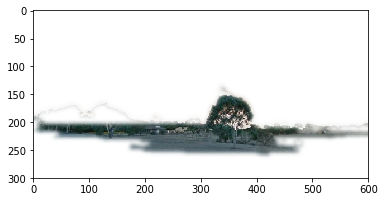

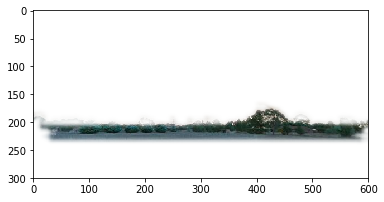

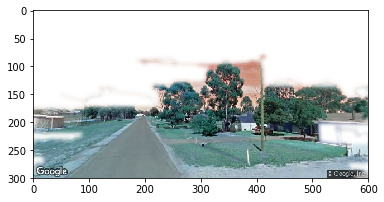

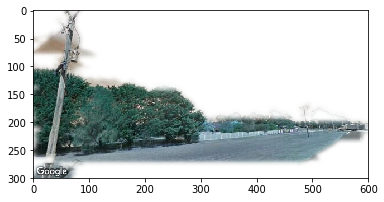

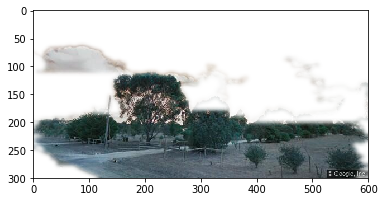

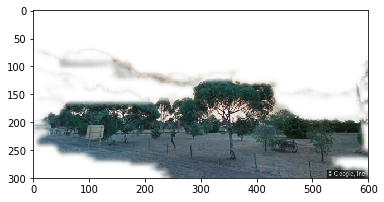

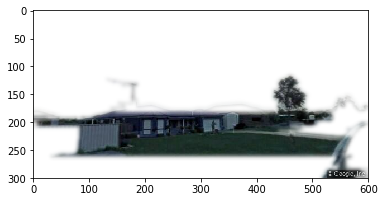

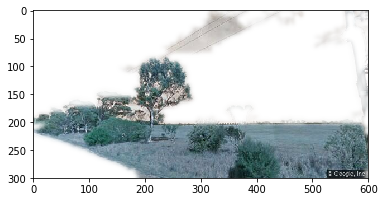

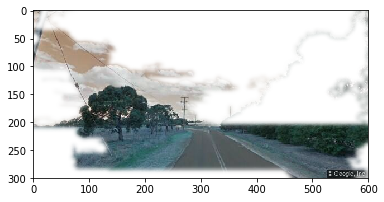

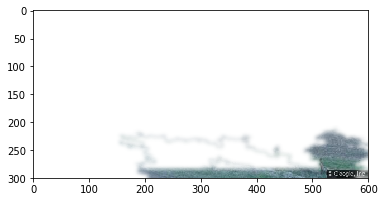

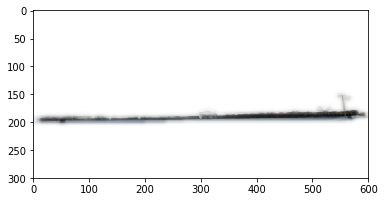

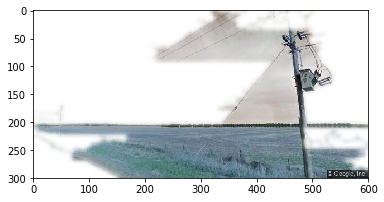

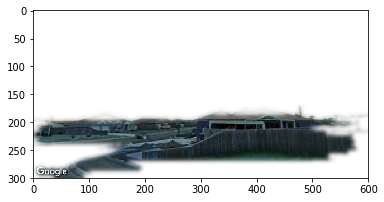

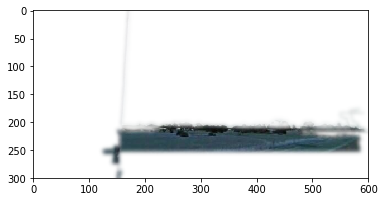

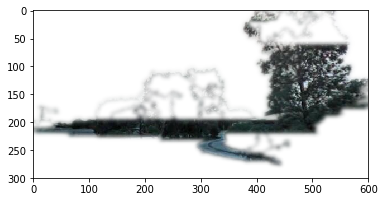

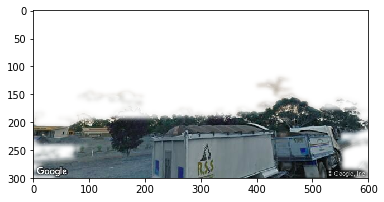

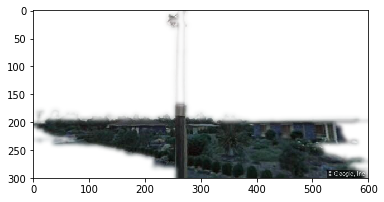

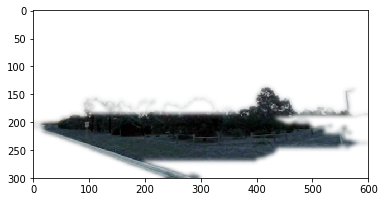

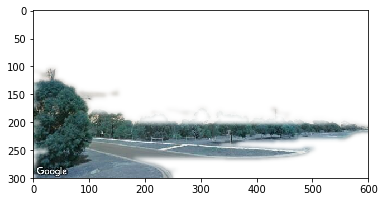

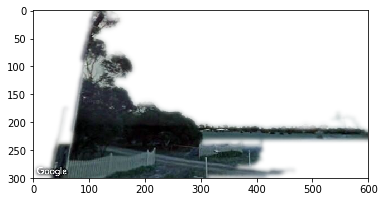

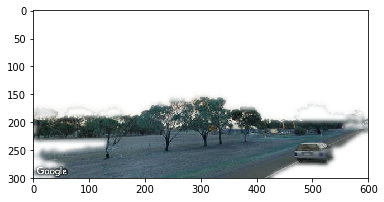

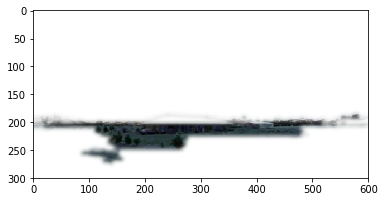

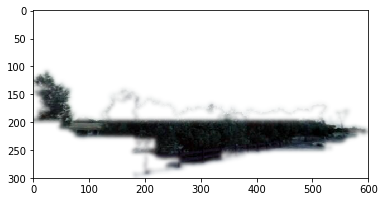

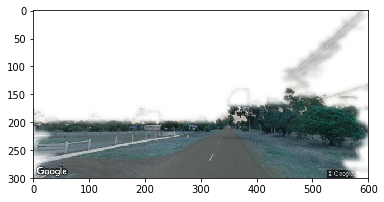

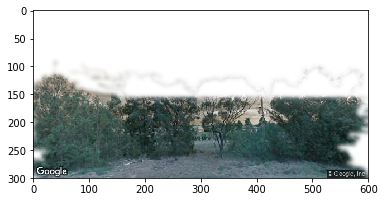

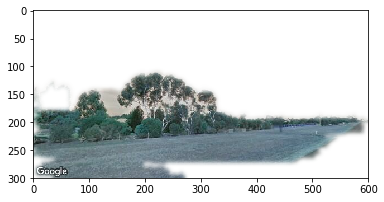

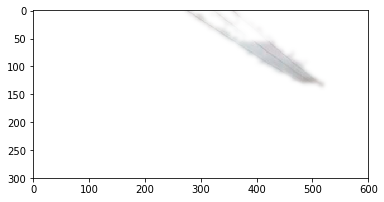

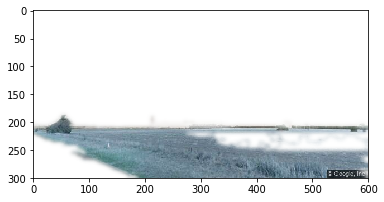

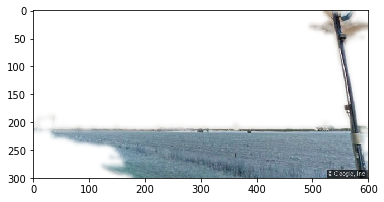

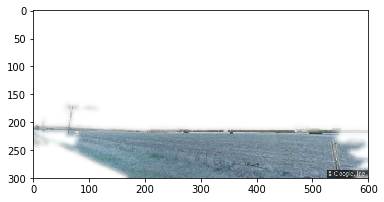

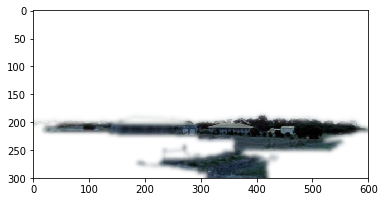

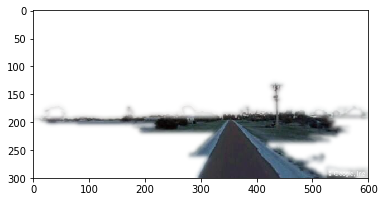

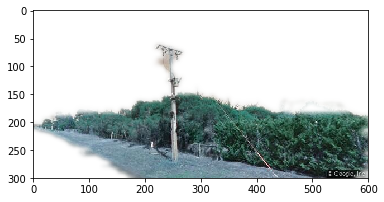

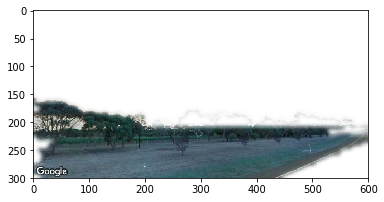

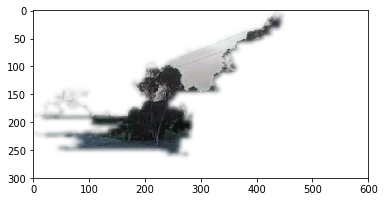

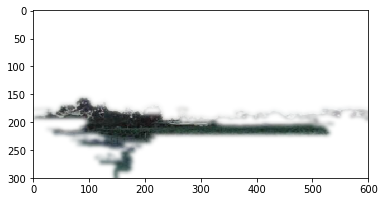

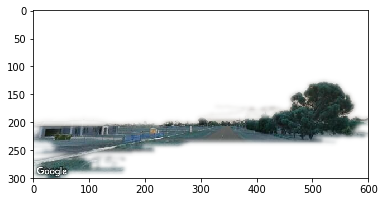

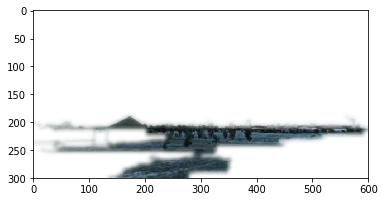

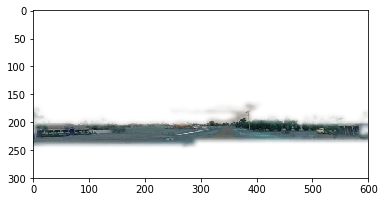

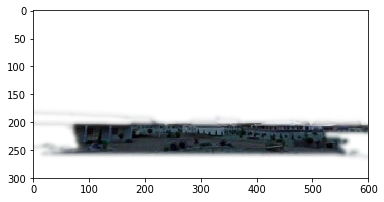

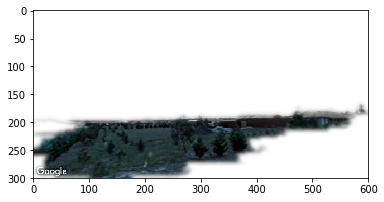

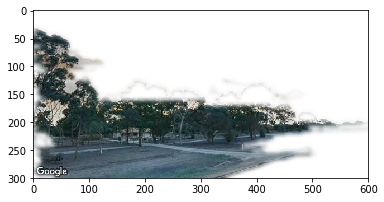

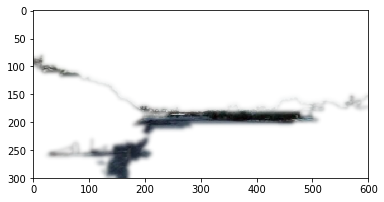

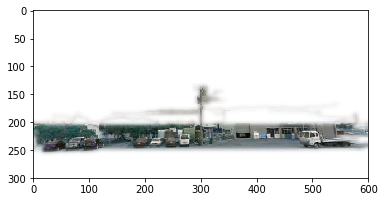

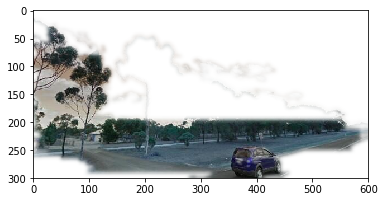

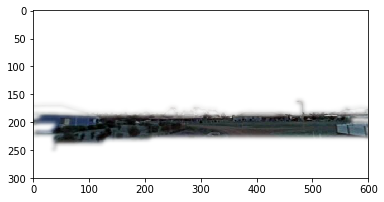

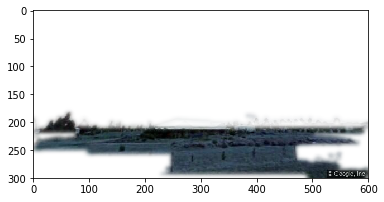

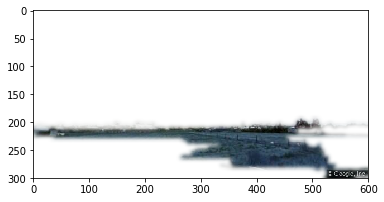

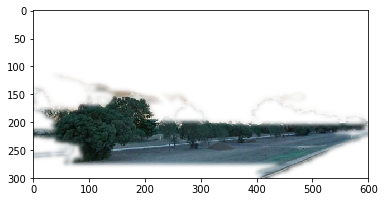

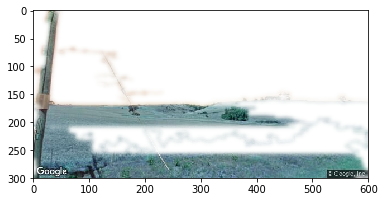

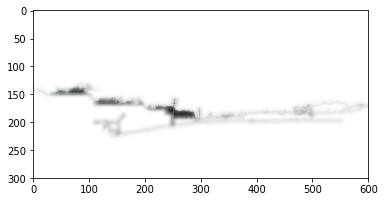

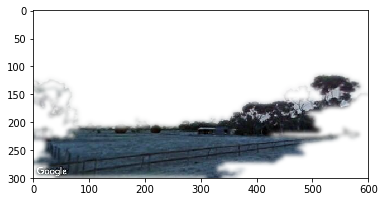

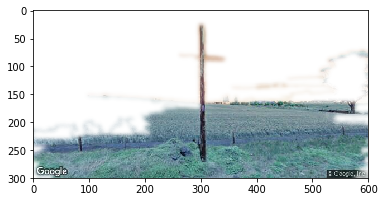

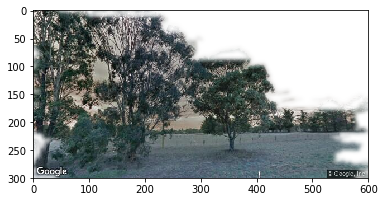

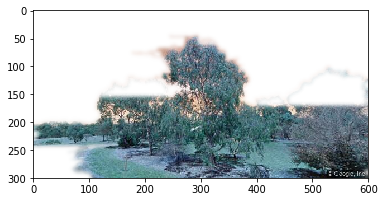

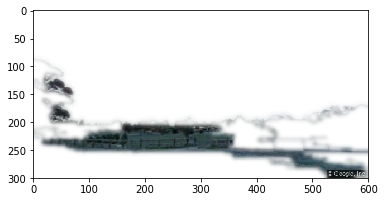

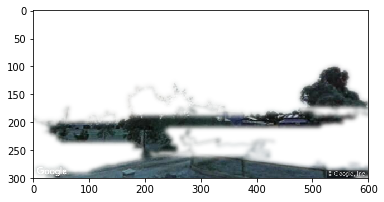

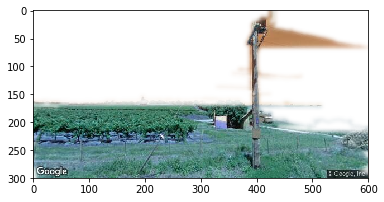

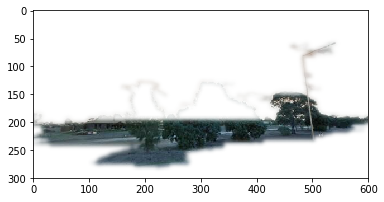

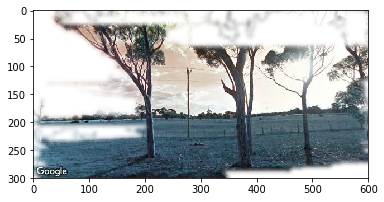

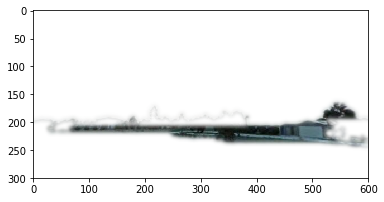

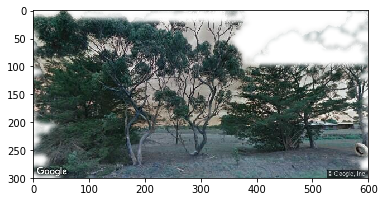

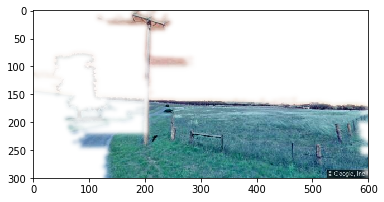

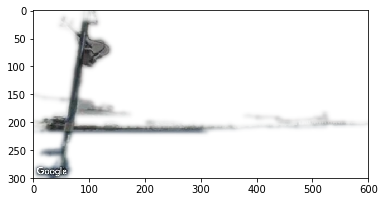

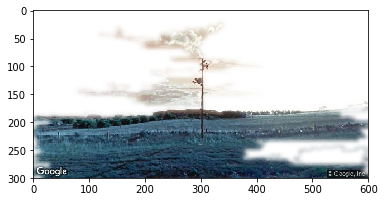

In [20]:

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

test_labels = ['T', 'T', 'T', 'H', 'H', 'T', 'H', 'T', 'R', 'H', 'T', 'V', 'T', 'R', 'B', 'H', 'B', 'H', 'R', 'R', 'R', 'R', 'T', 'B', 'T', 'R', 'H', 'T', 'B', 'T', 'B', 'H', 'B', 'B', 'H', 'B', 'B', 'B', 'B', 'B', 'B', 'R', 'T', 'B', 'B', 'H', 'T', 'R', 'B', 'B', 'T', 'H', 'T', 'B', 'V', 'T', 'B', 'R', 'T', 'B', 'B', 'B', 'R', 'B', 'B', 'B', 'B', 'T', 'T', 'H', 'T', 'T', 'B', 'B', 'B', 'R', 'B', 'R', 'H', 'B', 'B', 'B', 'T', 'B', 'R', 'B', 'B', 'B', 'T', 'R', 'B', 'T', 'B', 'B', 'B', 'B', 'T', 'B', 'T', 'H', 'B', 'T', 'T', 'T']
class_names = [ 'B', 'F', 'G', 'H', 'R', 'T', 'V']


ypred2 = [pos_to_char(int(np.argmax(i))) for i in y_pred]
print(ypred2)

for i in range(len(test_files)):
    if str(ypred2[i]) == 'T':
        plt.imshow(test_images[i])
        plt.show()
        #a = mpimg.imread(test_files[i])
        #plt.imshow(a)
        #plt.show()
        #print(str("image = ") + str(test_files[i]))
        #print(str("prediction = ") + str(ypred2[i]))

In [21]:
test_labels = ['T', 'T', 'T', 'H', 'H', 'T', 'H', 'T', 'R', 'H', 'T', 'V', 'T', 'R', 'B', 'H', 'B', 'H', 'R', 'R', 'R', 'R', 'T', 'B', 'T', 'R', 'H', 'T', 'B', 'T', 'B', 'H', 'B', 'B', 'H', 'B', 'B', 'B', 'B', 'B', 'B', 'R', 'T', 'B', 'B', 'H', 'T', 'R', 'B', 'B', 'T', 'H', 'T', 'B', 'V', 'T', 'B', 'R', 'T', 'B', 'B', 'B', 'R', 'B', 'B', 'B', 'B', 'T', 'T', 'H', 'T', 'T', 'B', 'B', 'B', 'R', 'B', 'R', 'H', 'B', 'B', 'B', 'T', 'B', 'R', 'B', 'B', 'B', 'T', 'R', 'B', 'T', 'B', 'B', 'B', 'B', 'T', 'B', 'T', 'H', 'B', 'T', 'T', 'T']
class_names = [ 'B', 'F', 'G', 'H', 'R', 'T', 'V']

In [22]:
report = classification_report(ypred2, test_labels)
print(report)

              precision    recall  f1-score   support

           B       0.61      0.47      0.53        57
           F       0.00      0.00      0.00         8
           G       0.00      0.00      0.00        13
           H       0.00      0.00      0.00         3
           R       0.13      0.40      0.20         5
           T       0.24      0.41      0.30        17
           V       0.00      0.00      0.00         1

   micro avg       0.35      0.35      0.35       104
   macro avg       0.14      0.18      0.15       104
weighted avg       0.38      0.35      0.35       104



C:\Users\MD\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [23]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(test_labels, ypred2)
print(acc)

0.34615384615384615
